In [1]:
import numpy as np, curvedsky as cs, sys, plottools as pl, local, tools_cmb, tqdm
from matplotlib.pyplot import *

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
def aps_read(qids):
    aobj = {q: local.init_analysis_params(qid=q) for q in qids}
    mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
    ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1] for q in qids}
    return aobj, mcl, ncl

In [22]:
def SNR(L,ckk,nkk,Lmin=100,Lmax=2048,fsky=2000./41000.):
    snr = np.sqrt( fsky * np.sum( (L[Lmin:Lmax+1]+.5)*ckk[Lmin:Lmax+1]**2/(ckk+nkk)[Lmin:Lmax+1]**2 ) )
    print(snr)
    return snr

In [4]:
def comb_Nl(qids,mcl,ncl,cTT):
    Nl = 0.
    for q in qids:
        flT = (mcl[q]-ncl[q])/cTT
        flT = 1.
        Nl += flT/ncl[q]
    Nl = 1./Nl
    return Nl

In [5]:
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n = ['boss_01','boss_02','boss_03','boss_04']
qids_d_sub = ['boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n_sub = ['boss_02','boss_03','boss_04']
qids_t = qids_d + qids_n
comb = ['d','n','dsub','nsub','dn']

In [6]:
aobj, mcl, ncl = aps_read(qids_t)
cTT = aobj[qids_t[0]].lcl[0,:]
cTE = aobj[qids_t[0]].lcl[3,:]
cEE = aobj[qids_t[0]].lcl[1,:]
lcl = aobj[qids_t[0]].lcl[:4,:]

In [7]:
Ncl = {}
Ncl['d'] = comb_Nl(qids_d,mcl,ncl,cTT)
Ncl['n'] = comb_Nl(qids_n,mcl,ncl,cTT)
Ncl['dsub'] = comb_Nl(qids_d_sub,mcl,ncl,cTT)
Ncl['nsub'] = comb_Nl(qids_n_sub,mcl,ncl,cTT)
Ncl['dn'] = 1./(1./Ncl['d']+1./Ncl['n'])

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [8]:
ocl = {}
for c in comb:
    ocl[c] = lcl.copy()
    ocl[c][0,:] += Ncl[c]
    ocl[c][1,:] += 2*Ncl[c]
    ocl[c][2,:] += 2*Ncl[c]

In [9]:
Lmax = 2048
rlmax = 3000
L = np.linspace(0,Lmax,Lmax+1)
ckk = aobj[qids_t[0]].ckk[:Lmax+1]
rlmin = 500

In [24]:
#Ag = {}
#for c in comb:
#    Ag['TT',c], __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],ocl[c][0,:rlmax+1],gtype='k')

In [25]:
#pl.plot_1dstyle(xmin=1,xmax=Lmax,ymin=0,ymax=5e-7)
#for c in comb:
#    plot(L,Ag['TT',c],label=c)
#plot(L,ckk,color='k',ls='-.')
#legend()

In [13]:
for c in comb:
    print(c)
    Ag['MV',c], __, __, __ = cs.norm_lens.qall([True,True,True,True,True,False],Lmax,rlmin,rlmax,lcl[:,:rlmax+1],ocl[c][:,:rlmax+1],gtype='k')

d
n
dsub
nsub
dn


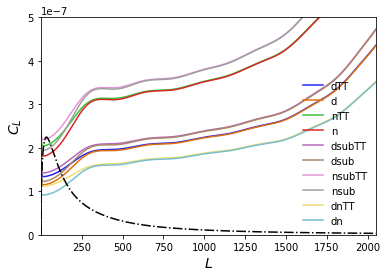

In [16]:
pl.plot_1dstyle(xmin=1,xmax=Lmax,ymin=0,ymax=5e-7)
for c in comb:
    plot(L,Ag['MV',c][0,:],label=c+'TT')
    plot(L,Ag['MV',c][5,:],label=c)
plot(L,ckk,color='k',ls='-.')
legend()

In [30]:
for q in [0,5]:
    for c in comb:
        print(q,c)
        SNR(L,ckk,Ag['MV',c][q],Lmin=10)
        SNR(L,ckk,Ag['MV',c][q],Lmin=50)
        SNR(L,ckk,Ag['MV',c][q],Lmin=50,Lmax=1000)

0 d
24.65372592248007
24.195720512085742
23.367098286137722
0 n
17.58759613327603
17.14195479902415
16.669725527374393
0 dsub
23.540269671389495
23.0825685533265
22.320661403274
0 nsub
16.633943953687254
16.192383662796814
15.764370946831711
0 dn
28.037854743760498
27.58052306155703
26.542254525277095
5 d
25.327161980134633
24.83021121694973
24.0156815174469
5 n
18.11403087539718
17.62916576719859
17.167715459998863
5 dsub
24.192278827643413
23.695232933668894
22.947097267318664
5 nsub
17.13884066086937
16.658460020951924
16.240504078541473
5 dn
28.95820582945863
28.455517077379124
27.4345134772696


In [ ]:
rlmins = np.arange(1000,400,-100)
SN_d = np.zeros(len(rlmins))
SN_n = np.zeros(len(rlmins))
SN_t = np.zeros(len(rlmins))
for i, rlmin in enumerate(rlmins):
    Ag = {}
    for q in tqdm.tqdm(qids_t):
        Ag[q], __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+ncl[q])[:rlmax+1],gtype='k')
    Ag_d, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],ocl['d'][0,:rlmax+1],gtype='k')
    Ag_n, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],ocl['n'][0,:rlmax+1],gtype='k')
    Ag_t, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],ocl['dn'][0,:rlmax+1],gtype='k')
    SN_d[i] = SNR(L,ckk,Ag_d)
    SN_n[i] = SNR(L,ckk,Ag_n)
    SN_t[i] = SNR(L,ckk,Ag_t)

In [ ]:
pl.plot_1dstyle(xmin=500,xmax=1000,ymin=0,ymax=25,xlab='lmin',ylab='SN')
plot(rlmins,SN_d)

In [ ]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_d:
    plot(L,Ag[q],label=local.qid_label(q))
plot(L,Ag_d,'-',label='total',color='k')
plot(L,ckk,color='k',ls='-.')
legend()

In [ ]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_n:
    plot(L,Ag[q],label=local.qid_label(q))
plot(L,Ag_n,'-',label='total',color='k')
plot(L,ckk,color='k',ls='-.')
legend()

In [ ]:
pl.plot_1dstyle(ylog=False,xmin=1,xmax=Lmax,ymin=0.,ymax=5e-7)
plot(L,Ag_d,'-',label='day (SN='+str(np.round(SN_d[-1],1))+')')
plot(L,Ag_n,'--',label='night (SN='+str(np.round(SN_n[-1],1))+')')
plot(L,Ag_t,'-',label='day+night (SN='+str(np.round(SN_t[-1],1))+')')
plot(L,ckk,color='k',ls='-.')
legend()